In [1]:
#Loading Libraries
import numpy as np
import pandas as pd
import io
#import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series

In [2]:
dg_df = pd.read_csv('C:\ISQS5381_Capstone_Project\DG_Data_2018.csv', sep = ',', low_memory=False)
dg_df[:10]

,MasterCustomerId,ConceptCode,FranchiseID,DoingBusinessAs,SubTotal,JobID,SyncJobId,SyncTenantID,SyncCustomerId,SyncCustomerTypeID,...,Frequency,Monetary,WeightedRecency,WeightedFrequency,WeightedMonetary,CustomerScore,CustomerScore_CustomerStatusID,CustomerScore_IsCrossBrand,CustomerScore_FirstBrand,CustomerScore_LastBrand
0,2,MRA,3292,Mr. Appliance Over The Mountain,299.41,23640402,23640402,2092,12620534,1,...,2,1,0.66,1.0,0.17,1.83,1,0,MRE,MRE
1,2,MRA,3292,Mr. Appliance Over The Mountain,160.39,23467938,23467938,2092,12673280,1,...,2,1,0.66,1.0,0.17,1.83,1,0,MRE,MRE
2,2,MRA,3292,Mr. Appliance Over The Mountain,210.59,23717884,23717884,3859,10153723,1,...,2,1,0.66,1.0,0.17,1.83,1,0,MRE,MRE
3,2,MRA,3292,Mr. Appliance Over The Mountain,224.17,23890420,23890420,2092,12620552,1,...,2,1,0.66,1.0,0.17,1.83,1,0,MRE,MRE
4,2,MRA,3292,Mr. Appliance Over The Mountain,297.42,23514146,23514146,2092,12620552,1,...,2,1,0.66,1.0,0.17,1.83,1,0,MRE,MRE
5,2,MRA,3292,Mr. Appliance Over The Mountain,321.41,23763866,23763866,2092,12620534,1,...,2,1,0.66,1.0,0.17,1.83,1,0,MRE,MRE
6,2,MRA,3292,Mr. Appliance Over The Mountain,79.00,23792354,23792354,2092,12657438,1,...,2,1,0.66,1.0,0.17,1.83,1,0,MRE,MRE
7,2,MRA,3292,Mr. Appliance Over The Mountain,181.11,23638848,23638848,2092,12694181,1,...,2,1,0.66,1.0,0.17,1.83,1,0,MRE,MRE
8,2,MDG,3569,Glass Doctor Of Northern Colorado,245.00,21121499,21121499,1776,8694656,1,...,2,1,0.66,1.0,0.17,1.83,1,0,MRE,MRE
9,2,MRA,3292,Mr. Appliance Over The Mountain,79.00,23638907,23638907,2092,12643716,1,...,2,1,0.66,1.0,0.17,1.83,1,0,MRE,MRE


In [3]:
dg_df.shape

(1000, 78)

In [4]:
dg_df.info()
dg_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 78 columns):
MasterCustomerId                  1000 non-null int64
ConceptCode                       1000 non-null object
FranchiseID                       1000 non-null int64
DoingBusinessAs                   1000 non-null object
SubTotal                          1000 non-null float64
JobID                             1000 non-null object
SyncJobId                         1000 non-null int64
SyncTenantID                      1000 non-null int64
SyncCustomerId                    1000 non-null int64
SyncCustomerTypeID                1000 non-null int64
SyncCustomerType                  1000 non-null object
DoNotMail                         1000 non-null int64
DoNotService                      1000 non-null int64
SyncLocationId                    1000 non-null int64
SyncJobTypeId                     309 non-null float64
SyncJobType                       309 non-null object
JobSummary             

MasterCustomerId                    int64
ConceptCode                        object
FranchiseID                         int64
DoingBusinessAs                    object
SubTotal                          float64
JobID                              object
SyncJobId                           int64
SyncTenantID                        int64
SyncCustomerId                      int64
SyncCustomerTypeID                  int64
SyncCustomerType                   object
DoNotMail                           int64
DoNotService                        int64
SyncLocationId                      int64
SyncJobTypeId                     float64
SyncJobType                        object
JobSummary                         object
CompletedOn                        object
SyncJobStatusTypeID                 int64
SyncJobStatusType                  object
JobLocationZipCode                 object
SyncInvoiceID                       int64
InvoiceSummary                     object
MasterCustomer_City               

In [5]:
dg_df.isnull().sum()

MasterCustomerId                    0
ConceptCode                         0
FranchiseID                         0
DoingBusinessAs                     0
SubTotal                            0
JobID                               0
SyncJobId                           0
SyncTenantID                        0
SyncCustomerId                      0
SyncCustomerTypeID                  0
SyncCustomerType                    0
DoNotMail                           0
DoNotService                        0
SyncLocationId                      0
SyncJobTypeId                     691
SyncJobType                       691
JobSummary                        223
CompletedOn                         0
SyncJobStatusTypeID                 0
SyncJobStatusType                   0
JobLocationZipCode                  4
SyncInvoiceID                       0
InvoiceSummary                    949
MasterCustomer_City               971
MasterCustomer_State              971
MasterCustomer_ZipCode            971
IndividualHo

In [6]:
dg_df.describe(include=['object'])

,ConceptCode,DoingBusinessAs,JobID,SyncCustomerType,SyncJobType,JobSummary,CompletedOn,SyncJobStatusType,JobLocationZipCode,InvoiceSummary,...,MailResponsiveEverFlag,MailREsponsivePreviousFlag,LoanToValueRatioRangeCode,LoanType,SecondPropertyIndicatorFlag,WealthfinderCode,CustomerScore_FirstJobDate,CustomerScore_LastJob,CustomerScore_FirstBrand,CustomerScore_LastBrand
count,1000,1000,1000,1000,309,777,1000,1000,996,51,...,29,29,23,9,29,29,1000,1000,1000,1000
unique,3,28,997,3,52,760,530,1,110,51,...,2,1,9,3,2,11,18,18,3,4
top,MRA,Mr. Appliance Over The Mountain,P1631034,Residential,STANDARD CASH CALL,REF THE FREEZER IS COOL BUT IS NOT FREEZING TH...,1/13/2017,Completed,35242,Installed new urinal in the men's room on the ...,...,Y,N,E,N,N,P,8/10/2015,9/2/2016,MRE,MRE
freq,864,797,2,861,121,2,9,1000,82,1,...,20,29,5,5,25,6,916,916,916,916


In [7]:
dg_df.describe(include='all')

,MasterCustomerId,ConceptCode,FranchiseID,DoingBusinessAs,SubTotal,JobID,SyncJobId,SyncTenantID,SyncCustomerId,SyncCustomerTypeID,...,Frequency,Monetary,WeightedRecency,WeightedFrequency,WeightedMonetary,CustomerScore,CustomerScore_CustomerStatusID,CustomerScore_IsCrossBrand,CustomerScore_FirstBrand,CustomerScore_LastBrand
count,1000.000000,1000,1000.000000,1000,1000.000000,1000,1.000000e+03,1000.00000,1.000000e+03,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000
unique,NaN,3,NaN,28,NaN,997,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4
top,NaN,MRA,NaN,Mr. Appliance Over The Mountain,NaN,P1631034,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MRE,MRE
freq,NaN,864,NaN,797,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,916,916
mean,5.283000,NaN,3423.105000,NaN,231.827020,NaN,2.735042e+07,3030.21700,1.297048e+07,1.133000,...,2.141000,1.109000,0.693330,1.070500,0.188530,1.952360,1.009000,0.018000,NaN,NaN
std,11.615672,NaN,619.760249,NaN,313.594076,NaN,6.642810e+06,1372.96745,3.194877e+06,0.348472,...,0.522869,0.453127,0.150867,0.261435,0.077032,0.459136,0.094488,0.133018,NaN,NaN
min,2.000000,NaN,2848.000000,NaN,9.060000,NaN,3.869360e+05,23.00000,2.905800e+05,0.000000,...,1.000000,1.000000,0.330000,0.500000,0.170000,1.000000,1.000000,0.000000,NaN,NaN
25%,2.000000,NaN,3292.000000,NaN,89.000000,NaN,2.399158e+07,2092.00000,1.262053e+07,1.000000,...,2.000000,1.000000,0.660000,1.000000,0.170000,1.830000,1.000000,0.000000,NaN,NaN
50%,2.000000,NaN,3292.000000,NaN,175.150000,NaN,2.761326e+07,3859.00000,1.264372e+07,1.000000,...,2.000000,1.000000,0.660000,1.000000,0.170000,1.830000,1.000000,0.000000,NaN,NaN
75%,2.000000,NaN,3292.000000,NaN,274.177500,NaN,3.154659e+07,3859.00000,1.511930e+07,1.000000,...,2.000000,1.000000,0.660000,1.000000,0.170000,1.830000,1.000000,0.000000,NaN,NaN


In [8]:
dg_df.JobSummary.values

array(['DW THE DETERGENT COMPARTMENT WILL NOT CLOSE.  WO# 6664-1  **RUDULPH REALTY NTE $200.00** - DISPENSER REPLACEMENT: $79.00',
       'SUB REF NEEDS LIGHT BULB AND SEEMS TO FREEZE UP 12-2 - COSMETIC REPAIR MINOR: $158.23',
       'ICE MACHINE NEEDS TO BE CLEANED. 9-11',
       'OVEN ELEC. STOVE STOPPED WORKING. WO# 2136-1  **NOT TO EXCEED $300.00**',
       'FRIDGE IS NOT COOLING. ROEBUCK AREA  2244-1  **GK HOUSING NTE $300.00**  PREVIOUS NOTES:  DE ICE DRAIN LINE AND REPAIR EVAP. FAN ',
       'FRIDGE SETTING CONTROLLED BY THE FRONT PANEL ARE CHANGING RANDOMLY WHEN THE FRIDGE IS NOT BEING INTERACTED WITH.  WO# 6692-1  **RUDULPH REALTY CALL NTE $200** ',
       '5/28 2YR OLD WHIRLPOOL DUET DRYER IS MAKING A STRANGE NOISE AND HAS A BURNING SMELL. hcs',
       '6/2/15 3P -5P / HER KENMORE DISHWASHER WILL NOT TURN ON. IT IS UNDER MOUNTED TO THE CABNET. 5/29/15 bdp',
       nan,
       'MW COMES ON BUT DOES NOT HEAT. 8-10   **AHI PROPERTIES CALL 888-664-7368**',
       nan, '6/9/15 8A-

In [9]:
dg_df.MasterCustomerId.value_counts(dropna=False)

2     916
50     33
53     15
46      5
37      5
16      5
27      4
7       3
25      2
19      2
5       2
43      1
39      1
34      1
33      1
51      1
29      1
23      1
32      1
Name: MasterCustomerId, dtype: int64

In [10]:
dg_df.SyncTenantID.value_counts(dropna=False)

3859    315
2092    312
4802    170
587      54
616      32
3931     17
3838     15
319      13
4567      9
2381      8
566       5
539       4
1602      4
4788      4
1581      4
1565      3
2467      3
4027      3
3981      3
351       2
26        2
322       2
3819      2
4798      2
1545      2
1504      1
478       1
594       1
752       1
523       1
537       1
1776      1
3952      1
632       1
23        1
Name: SyncTenantID, dtype: int64

In [11]:
dg_df.SyncCustomerId.value_counts(dropna=False)

12620534    142
12643716     79
12620552     75
15119302     49
12643734     37
12620554     31
12694181     21
12673279     19
12985799     16
6142313      15
5595732      13
12657441     11
12820237      6
13149306      6
10465646      6
5012041       5
904430        5
780426        5
10457582      4
16091219      4
12657438      4
10319620      4
4848479       4
5590719       4
9830342       4
10497296      4
15996258      4
12901355      4
14575141      4
15996163      3
           ... 
17179328      1
10116551      1
10617546      1
13971247      1
9843408       1
15603264      1
14121572      1
14085852      1
14085855      1
16403116      1
10440897      1
14085860      1
15513260      1
18341524      1
9761422       1
15088267      1
12839555      1
18707071      1
16417406      1
13927037      1
15398524      1
15679099      1
8797077       1
10589803      1
14905899      1
13751908      1
13751903      1
14563920      1
16405060      1
9930753       1
Name: SyncCustomerId, Le

In [4]:
dg_df.SyncCustomerType.value_counts(dropna=False) 

Residential    861
Commercial     136
None             3
Name: SyncCustomerType, dtype: int64

In [5]:
#dg_tx = pd.read_csv(io.StringIO(dg_df), header=None, names=['JobSummary'])
#dg_tx.head()

In [16]:
dg_txt = dg_df['JobSummary']
dg_txt

0      DW THE DETERGENT COMPARTMENT WILL NOT CLOSE.  ...
1      SUB REF NEEDS LIGHT BULB AND SEEMS TO FREEZE U...
2                  ICE MACHINE NEEDS TO BE CLEANED. 9-11
3      OVEN ELEC. STOVE STOPPED WORKING. WO# 2136-1  ...
4      FRIDGE IS NOT COOLING. ROEBUCK AREA  2244-1  *...
5      FRIDGE SETTING CONTROLLED BY THE FRONT PANEL A...
6      5/28 2YR OLD WHIRLPOOL DUET DRYER IS MAKING A ...
7      6/2/15 3P -5P / HER KENMORE DISHWASHER WILL NO...
8                                                    NaN
9      MW COMES ON BUT DOES NOT HEAT. 8-10   **AHI PR...
10                                                   NaN
11     6/9/15 8A-10A / SAMSUNG DRYER NOT HEATING falc...
12     ICE MAKER IS NOT PRODUCING ICE. 2-4  **GOLDEN ...
13     GAS DRYER INSTALL DRYER FLEX HOSE FOR VENT.  W...
14     FRIDGE IS NOT COOLING. HOOVER AREA 4-6 WO# 696...
15     ge mini ref the handles on the door are coming...
16     ICE MAKER IS NOT WORKING.  WO# 6943-1  **RUDUL...
17     Tenants report that the 

In [3]:
dg_df.columns

Index(['MasterCustomerId', 'ConceptCode', 'FranchiseID', 'DoingBusinessAs',
       'SubTotal', 'JobID', 'SyncJobId', 'SyncTenantID', 'SyncCustomerId',
       'SyncCustomerTypeID', 'SyncCustomerType', 'DoNotMail', 'DoNotService',
       'SyncLocationId', 'SyncJobTypeId', 'SyncJobType', 'JobSummary',
       'CompletedOn', 'SyncJobStatusTypeID', 'SyncJobStatusType',
       'JobLocationZipCode', 'SyncInvoiceID', 'InvoiceSummary',
       'MasterCustomer_City', 'MasterCustomer_State', 'MasterCustomer_ZipCode',
       'IndividualHoHAge', 'IndividualHoHDateOfBirth', 'IndividualHoHGender',
       'IndividualHoHMaritalStatusCode', 'NumberBathrooms', 'NumberBedrooms',
       'Rooms', 'NumberChildren', 'ChildrenPresentFlag',
       'ConstructionTypeCode', 'InfopersonaCluster',
       'ExpendableIncomeRankCode', 'Fireplaces', 'HomeAge', 'YearHomeBuilt',
       'HomeDecoratingInterestFlag', 'HomeEquityEstimateCode',
       'OwnRentLikelihoodCode', 'HomeSalePrice', 'HomeSize', 'HomeValueCode',
      

In [4]:
dg_df.columns
dg_df.drop(['SyncJobType', 'InvoiceSummary', 'MasterCustomer_ZipCode', 'IndividualHoHAge',
       'IndividualHoHDateOfBirth', 'IndividualHoHGender',
       'IndividualHoHMaritalStatusCode', 'NumberBathrooms', 'NumberBedrooms',
       'Rooms', 'NumberChildren', 'ChildrenPresentFlag',
       'ConstructionTypeCode', 'InfopersonaCluster',
       'ExpendableIncomeRankCode', 'Fireplaces', 'HomeAge', 'YearHomeBuilt',
       'HomeDecoratingInterestFlag', 'HomeEquityEstimateCode',
       'OwnRentLikelihoodCode', 'HomeSalePrice', 'HomeSize', 'HomeValueCode',
       'FamilyIncomeDetectorCode', 'LengthOfResidenceYears', 'LocationType',
       'LotSize', 'MailResponsiveEverFlag', 'MailREsponsivePreviousFlag',
       'LoanAmount', 'LoanToValueRatioRangeCode', 'LoanType', 'PropertyType',
       'SurnamesInHousehold', 'SecondPropertyIndicatorFlag',
       'HigherEducationModel', 'HomeImprovementModel', 'WealthfinderCode',
      'CustomerScore_TotalJobs', 'CustomerScore_DaysSinceLastJob', 'Recency', 'Frequency',
        'Monetary', 'WeightedRecency', 'WeightedFrequency', 'WeightedMonetary'], axis=1, inplace=True)

In [5]:
dg_df.columns

Index(['MasterCustomerId', 'ConceptCode', 'FranchiseID', 'DoingBusinessAs',
       'SubTotal', 'JobID', 'SyncJobId', 'SyncTenantID', 'SyncCustomerId',
       'SyncCustomerTypeID', 'SyncCustomerType', 'DoNotMail', 'DoNotService',
       'SyncLocationId', 'SyncJobTypeId', 'JobSummary', 'CompletedOn',
       'SyncJobStatusTypeID', 'SyncJobStatusType', 'JobLocationZipCode',
       'SyncInvoiceID', 'MasterCustomer_City', 'MasterCustomer_State',
       'CustomerScore_Total', 'CustomerScore_FirstJobDate',
       'CustomerScore_LastJob', 'CustomerScore',
       'CustomerScore_CustomerStatusID', 'CustomerScore_IsCrossBrand',
       'CustomerScore_FirstBrand', 'CustomerScore_LastBrand'],
      dtype='object')

In [13]:
dg_df = dg_df['SubTotal'].groupby(['DoingBusinessAs']).mean()
dg_df
sns.violinplot(dg_df['Age'], df['Gender']) #Variable Plot
sns.despine()

KeyError: 'DoingBusinessAs'

In [6]:
dg_df['CompletedOn'] = pd.to_datetime(dg_df['CompletedOn'])
dg_df['CustomerScore_LastJob'] = pd.to_datetime(dg_df['CustomerScore_LastJob'])

In [4]:
dg_df.drop(['MasterCustomerId', 'ConceptCode', 'FranchiseID', 'JobID', 'SyncJobId',
               'SyncCustomerTypeID', 'DoNotMail', 'DoNotService', 'SyncLocationId',
               'SyncJobTypeId', 'SyncJobType', 'JobSummary', 'SyncJobStatusTypeID',
               'SyncJobStatusType', 'JobLocationZipCode', 'JobLocationZipCode',
               'SyncInvoiceID', 'InvoiceSummary', 'MasterCustomer_ZipCode',
               'NumberBathrooms', 'NumberBedrooms', 'ChildrenPresentFlag', 'ConstructionTypeCode',
               'InfopersonaCluster', 'ExpendableIncomeRankCode', 'Fireplaces',
               'HomeDecoratingInterestFlag', 'HomeEquityEstimateCode', 'OwnRentLikelihoodCode',
               'HomeSalePrice', 'HomeSize', 'HomeValueCode', 'FamilyIncomeDetectorCode',
               'LengthOfResidenceYears', 'LotSize', 'MailResponsiveEverFlag',
               'MailREsponsivePreviousFlag', 'LoanToValueRatioRangeCode', 'LoanType', 'SurnamesInHousehold',
               'SecondPropertyIndicatorFlag', 'HigherEducationModel', 'HomeImprovementModel',
               'WealthfinderCode', 'CustomerScore_Total', 'CustomerScore_FirstJobDate',
               'CustomerScore_TotalJobs', 'CustomerScore_DaysSinceLastJob',
               'WeightedRecency', 'WeightedFrequency', 'WeightedMonetary', 'CustomerScore',
               'CustomerScore_CustomerStatusID', 'CustomerScore_IsCrossBrand',
               'CustomerScore_FirstBrand', 'CustomerScore_LastBrand'], axis=1, inplace=True)

In [5]:
dg_df.dtypes

DoingBusinessAs                    object
SubTotal                          float64
SyncTenantID                        int64
SyncCustomerId                      int64
SyncCustomerType                   object
CompletedOn                        object
MasterCustomer_City                object
MasterCustomer_State               object
IndividualHoHAge                  float64
IndividualHoHDateOfBirth          float64
IndividualHoHGender                object
IndividualHoHMaritalStatusCode     object
Rooms                             float64
NumberChildren                    float64
HomeAge                           float64
YearHomeBuilt                     float64
LocationType                       object
LoanAmount                        float64
PropertyType                      float64
CustomerScore_LastJob              object
Recency                             int64
Frequency                           int64
Monetary                            int64
dtype: object

(array([735750., 735872., 735995., 736116., 736238., 736361., 736481.,
        736603., 736726., 736846.]), <a list of 10 Text xticklabel objects>)

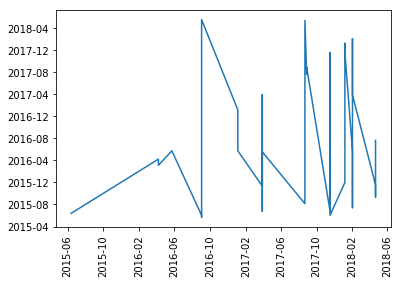

In [10]:
#dg_df.CustomerScore_LastJob.plot(kind='hist', bins=12)
dg_df = dg_df.sort_values('CustomerScore_LastJob', ascending=True)
plt.plot(dg_df['CustomerScore_LastJob'], dg_df['CompletedOn'])
plt.xticks(rotation='vertical')

(array([735750., 735872., 735995., 736116., 736238., 736361., 736481.,
        736603., 736726., 736846.]), <a list of 10 Text xticklabel objects>)

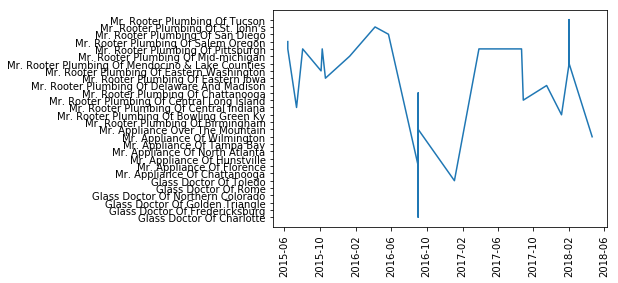

In [11]:
dg_df = dg_df.sort_values('CustomerScore_LastJob', ascending=True)
plt.plot(dg_df['CustomerScore_LastJob'], dg_df['DoingBusinessAs'])
plt.xticks(rotation='vertical')

(array([735750., 735872., 735995., 736116., 736238., 736361., 736481.,
        736603., 736726., 736846.]), <a list of 10 Text xticklabel objects>)

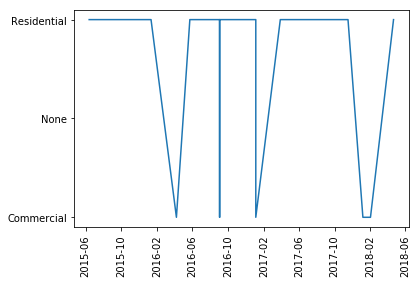

In [12]:
dg_df = dg_df.sort_values('CustomerScore_LastJob', ascending=True)
plt.plot(dg_df['CustomerScore_LastJob'], dg_df['SyncCustomerType'])
plt.xticks(rotation='vertical')

(array([735750., 735872., 735995., 736116., 736238., 736361., 736481.,
        736603., 736726., 736846.]), <a list of 10 Text xticklabel objects>)

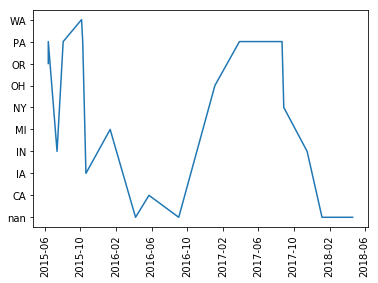

In [15]:
dg_df = dg_df.sort_values('CustomerScore_LastJob', ascending=True)
plt.plot(dg_df['CustomerScore_LastJob'], dg_df['MasterCustomer_State'])
plt.xticks(rotation='vertical')

(array([735750., 735872., 735995., 736116., 736238., 736361., 736481.,
        736603., 736726., 736846.]), <a list of 10 Text xticklabel objects>)

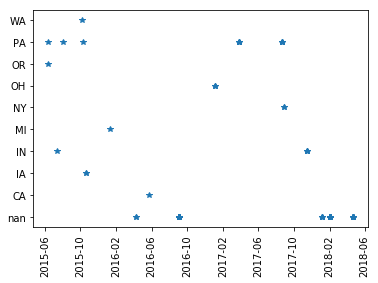

In [18]:
#a scatter plot of Cutomer's last job and Location (State)
plt.plot(dg_df['CustomerScore_LastJob'], dg_df['MasterCustomer_State'], '*')
plt.xticks(rotation='vertical')

(array([735689., 735811., 735933., 736055., 736177., 736299., 736420.,
        736542., 736664., 736785.]), <a list of 10 Text xticklabel objects>)

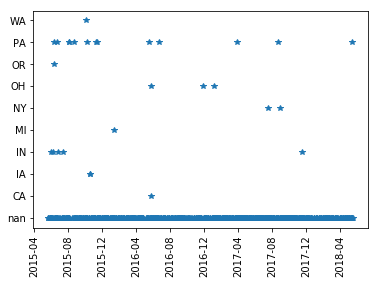

In [19]:
#a scatter plot of Cutomer's last job and Location (City)
plt.plot(dg_df['CompletedOn'], dg_df['MasterCustomer_State'], '*')
plt.xticks(rotation='vertical')

(array([735750., 735872., 735995., 736116., 736238., 736361., 736481.,
        736603., 736726., 736846.]), <a list of 10 Text xticklabel objects>)

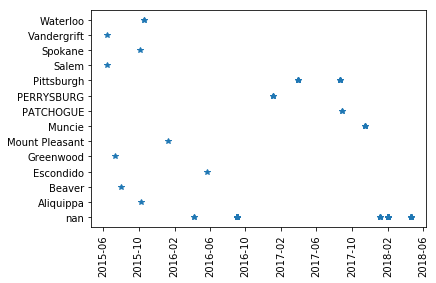

In [20]:
#a scatter plot of Cutomer's last job and Location (City)
plt.plot(dg_df['CustomerScore_LastJob'], dg_df['MasterCustomer_City'], '*')
plt.xticks(rotation='vertical')

(array([735689., 735811., 735933., 736055., 736177., 736299., 736420.,
        736542., 736664., 736785.]), <a list of 10 Text xticklabel objects>)

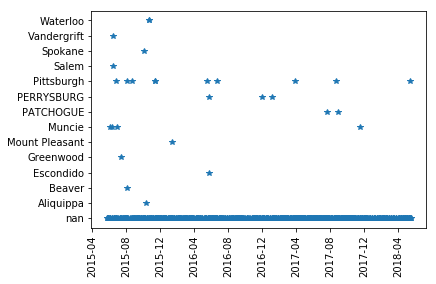

In [17]:
#a scatter plot of Cutomer's last job and Location (City)
plt.plot(dg_df['CompletedOn'], dg_df['MasterCustomer_City'], '*')
plt.xticks(rotation='vertical')

(array([735689., 735811., 735933., 736055., 736177., 736299., 736420.,
        736542., 736664., 736785.]), <a list of 10 Text xticklabel objects>)

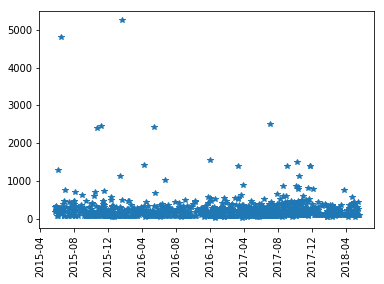

In [21]:
#a scatter plot of Cutomer's last job and Location (City)
plt.plot(dg_df['CompletedOn'], dg_df['SubTotal'], '*')
plt.xticks(rotation='vertical')

(array([735750., 735872., 735995., 736116., 736238., 736361., 736481.,
        736603., 736726., 736846.]), <a list of 10 Text xticklabel objects>)

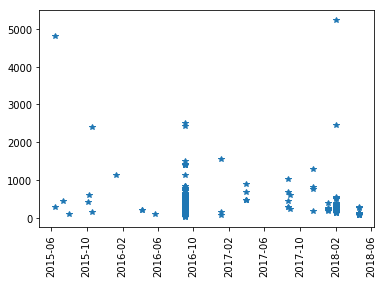

In [22]:
#a scatter plot of Cutomer's last job and Location (City)
plt.plot(dg_df['CustomerScore_LastJob'], dg_df['SubTotal'], '*')
plt.xticks(rotation='vertical')

In [8]:
#x,y = np.meshgrid(dg_df.columns, dg_df.index)

#dg_df *= 10
#plt.scatter(x=x.flatten("CustomerScore_LastJob"), y=y.flatten("MasterCustomer_State"),
            #s=dg_df.values.flatten("SubTotal"))
#plt.margins(.4)
#plt.show()

TypeError: Could not operate 10 with block values unsupported operand type(s) for *: 'Timestamp' and 'int'

In [9]:
#dg_df = dg_df.unstack().reset_index()
#dg_df.columns = list("")
#dg_df["SubTotal"] *= 5000
#plt.scatter(x="CustomerScore_LastJob", y="MasterCustomer_State", s="SubTotal", data=dg_df)
#plt.margins(.4)
#plt.show()

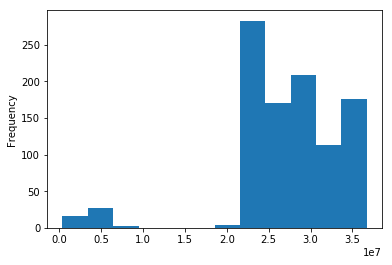

In [48]:
dg_df.SyncJobId.plot(kind='hist', bins=12)

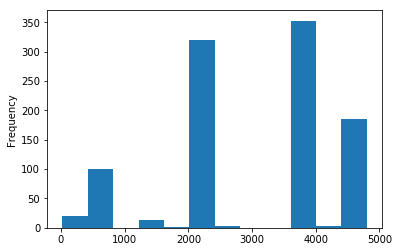

In [34]:
dg_df.SyncTenantID.plot(kind='hist', bins=12)

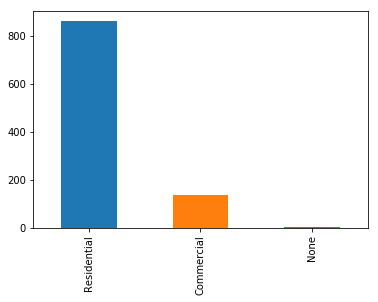

In [37]:
dg_df.SyncCustomerType.value_counts().plot(kind='bar')

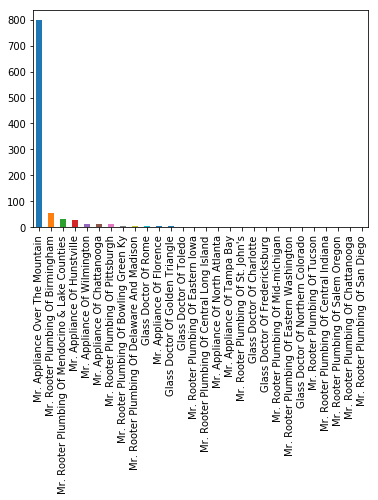

In [38]:
dg_df.DoingBusinessAs.value_counts().plot(kind='bar')

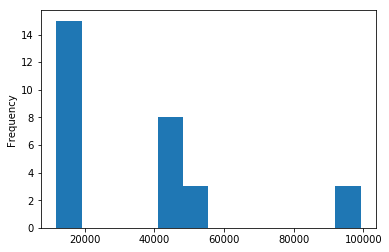

In [45]:
dg_df.MasterCustomer_ZipCode.plot(kind='hist', bins=12)

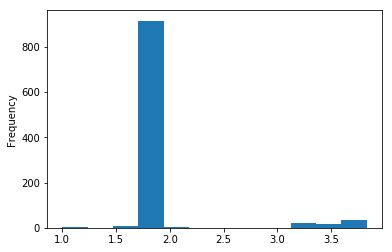

In [53]:
dg_df.CustomerScore.plot(kind='hist', bins=12)